# Project 2

### Sophia Arackal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

## Part A: Stock Simulation Function

In this section, I will be creating a function to generate simulated daily stock prices.

In [2]:
#Write a function named simulate_stock. 


def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc=(rate/252), scale=(vol/(252**0.5)), size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(start * daily_multipliers,2)
    daily_prices = np.concatenate(([start], daily_prices))
    
    return daily_prices


I will be taking the function I had created in the previous cell and test it with different values to see how well it works.


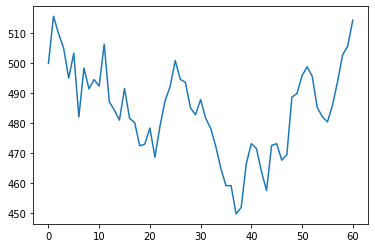

In [3]:
#Test my function

np.random.seed(1)
plt.plot(simulate_stock(500,0.08,0.30,60))
plt.show()



## Part B: Annual Yield Function

In this section, I will create a function to calculate annual yield during a particular run.

In [4]:
def find_yield(run):
    final_price = run[-1]
    initial_price = run[0]
    days = len(run) - 1
    annual_yield = math.log((final_price/ initial_price))*(252/(days))
    
    return np.round(annual_yield,4)



I am going to test the function by running it on the previous simulated run.

In [5]:
np.random.seed(1)
print(find_yield(simulate_stock(start = 500, rate = 0.08, vol = 0.30, days = 60)))

0.1196


I will explore the potential variability in my simulated runs by creating and plotting 25 simulated runs.

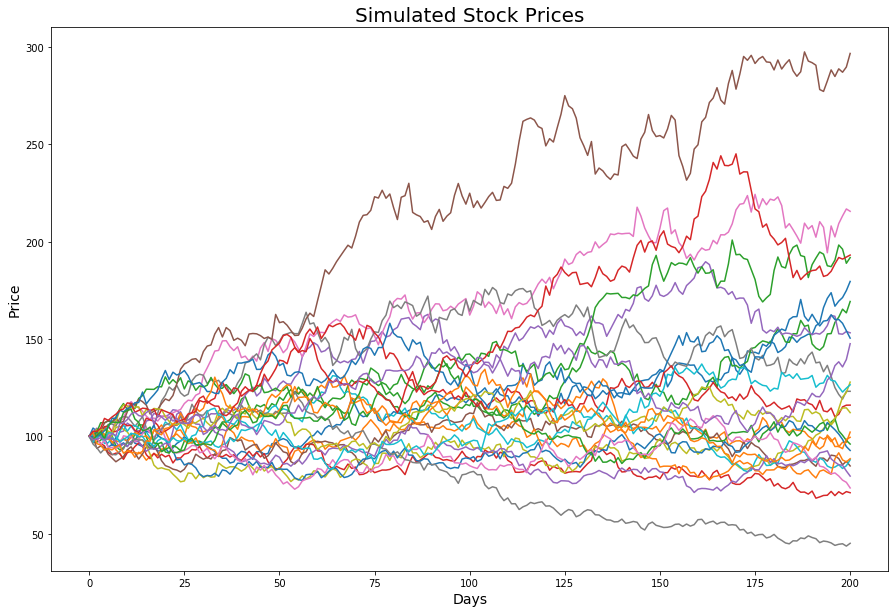

In [6]:
# Create empty lists
simulations=[]
yields=[]
np.random.seed(1)
# Set the plot size
plt.figure(figsize = (15,10))

# Loop through 25 simulated runs
for x in range(0,25) :
    simulations.append(simulate_stock(start = 100, rate = 0.06, vol = 0.4, days = 200))
    yields.append(find_yield(simulations[x]))
    plt.plot(simulations[x])

# Set labels for the plot
plt.title('Simulated Stock Prices', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()


In the cell below, I will display the yields for the 25 simulated runs.
Print the list of annual yields created in the previous code cell. 

In [7]:
# Create empty lists
simulations=[]
yields=[]
np.random.seed(1)
# Loop through 25 simulated runs
for x in range(0,25) :
    simulations.append(simulate_stock(start = 100, rate = 0.06, vol = 0.4, days = 200))
    yields.append(find_yield(simulations[x]))
print(yields) 




[0.7375, 0.0266, 0.663, -0.4319, 0.5371, -0.2086, 0.9679, 0.2618, 0.3093, -0.1628, -0.0956, -0.1546, -0.0517, 0.1869, -0.2887, 1.3704, -0.3891, -1.0067, 0.1443, 0.2954, 0.5144, -0.0072, 0.8206, 0.8291, 0.4901]


## Part C: Finding Seeds that Generate Specific Outcomes

In this section, I will be practicing using seeds and find seeds that result in specific outcomes. 

In the cell below, Stock A has the highest simulated final price.

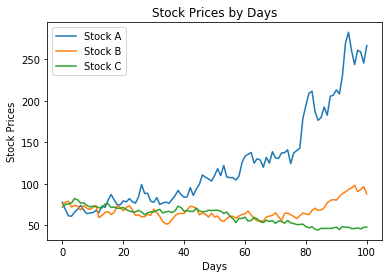

In [8]:
#where A is highest
np.random.seed(987)
A = plt.plot(simulate_stock(78,0.04,1.2,100), label ='Stock A')
B = plt.plot(simulate_stock(75,0.08,0.8,100), label ='Stock B')
C = plt.plot(simulate_stock(72,0.16,0.6,100), label ='Stock C')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.title('Stock Prices by Days')
plt.show()




In the cell below, Stock B has the highest simulated final price.

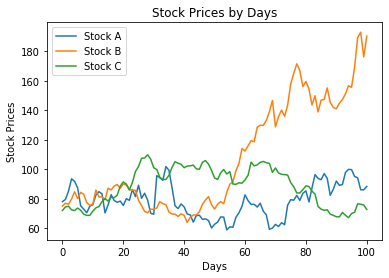

In [9]:
#where B is highest
np.random.seed(533)
A = plt.plot(simulate_stock(78,0.04,1.2,100), label ='Stock A')
B = plt.plot(simulate_stock(75,0.08,0.8,100), label ='Stock B')
C = plt.plot(simulate_stock(72,0.16,0.6,100), label ='Stock C')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.title('Stock Prices by Days')
plt.show()

In the cell below, Stock C has the highest simulated final price.

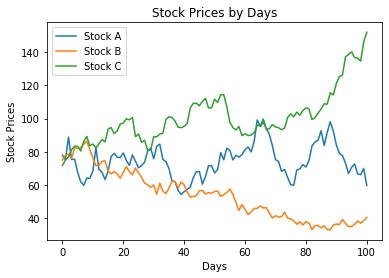

In [10]:
#where C is the highest
np.random.seed(882)
A = plt.plot(simulate_stock(78,0.04,1.2,100), label ='Stock A')
B = plt.plot(simulate_stock(75,0.08,0.8,100), label ='Stock B')
C = plt.plot(simulate_stock(72,0.16,0.6,100), label ='Stock C')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.title('Stock Prices by Days')
plt.show()


## Part D: Monte Carlo Simulation

In this section, I will be creating a function to generate a number of simulated stock runs that will equal the num_runs.


In [11]:
#Write a function named monte_carlo. 

def monte_carlo(start, rate, vol, days, num_runs):
    final_prices =[]
    annual_yields =[]
    for runs in range(0, num_runs):
        num_runs = simulate_stock(start, rate, vol, days)
        q = num_runs[-1]
        final_prices.append(q)
        r = find_yield(num_runs)
        annual_yields.append(r)
    np.asarray(final_prices)
    np.asarray(annual_yields)
    return (final_prices, annual_yields)



I will be testing my function below with a specific seed. 



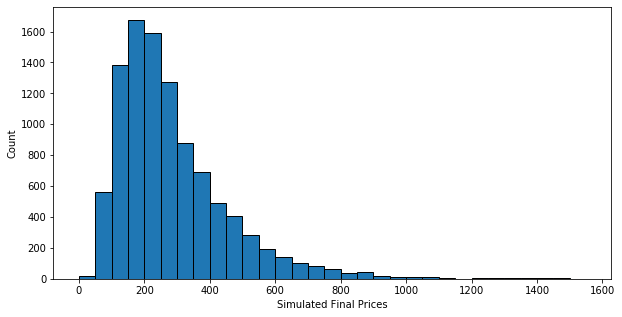

In [12]:
# Create a histogram of the final prices. 

plt.figure(figsize=[10,5])
np.random.seed(1)
sim = monte_carlo(200, 0.10, 0.4, 500, 10000)

plt.hist(sim[0], bins=np.arange(0, 1600, 50), edgecolor='black')
plt.xlabel('Simulated Final Prices')
plt.ylabel('Count')
plt.show()



I will be displaying the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices in the cell below.

In [13]:
#Use np.percentile to calculate the 10th, 25th, 50th, 75th, and 90th percentiles for the final prices in the simulated runs generated for the stock. 


print(f'10th percentile:  {np.percentile(sim[0], 10):<10,.2f}') 
print(f'25th percentile:  {np.percentile(sim[0], 25):<10,.2f}')
print(f'50th percentile:  {np.percentile(sim[0], 50):<10,.2f}') 
print(f'75th percentile:  {np.percentile(sim[0], 75):<10,.2f}')
print(f'90th percentile:  {np.percentile(sim[0], 90):<10,.2f}')


10th percentile:  118.05    
25th percentile:  165.57    
50th percentile:  242.95    
75th percentile:  357.56    
90th percentile:  505.91    


## Part E: Effects of Volatility

In this section, I will looking at the effects of volatility on simulated stock prices by performing two Monte Carlo
simulations with different volatilities.

In [14]:
#Calculate the average of the simulated annual yields for each stock.

np.random.seed(1)
stock_A = monte_carlo(100, 0.12, 0.3, 150, 10000)
stock_B = monte_carlo(100, 0.12, 0.7, 150, 10000)
average_A = np.average(stock_A[0])
average_B = np.average(stock_B[0])

print(f'Average Annual Yield for B over 10000 runs:  {average_A:<10,.4f}')  
print(f'Average Annual Yield for B over 10000 runs:  {average_B:<10,.4f}')  


Average Annual Yield for B over 10000 runs:  110.4273  
Average Annual Yield for B over 10000 runs:  123.7250  


I will visually inspect the results of the two Monte Carlo simulations by plotting histograms of the final prices. 

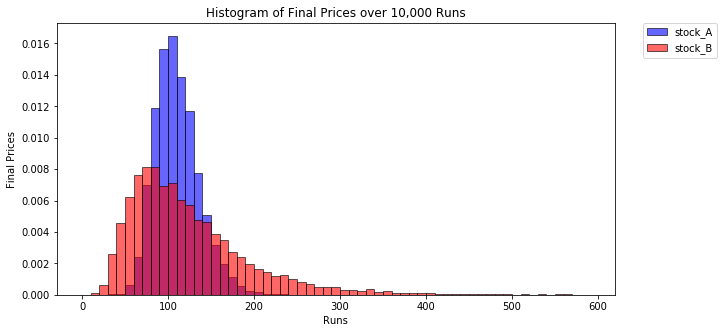

In [15]:
#Create a figure with two histograms on the same axes that displays the distribution of final prices for each stock over 
#the 10,000 simulated runs in one of the two Monte Carlo simulations.

np.random.seed(1)
stock_A = monte_carlo(100, 0.12, 0.3, 150, 10000)
stock_B = monte_carlo(100, 0.12, 0.7, 150, 10000)

plt.figure(figsize=[10,5])

plt.hist(stock_A[0], bins=np.arange(0, 600, 10), density = True, alpha= 0.6, edgecolor='k', color = ['b'], label="stock_A") 
plt.hist(stock_B[0], bins=np.arange(0, 600, 10), density = True, alpha= 0.6, edgecolor='k', color = ['r'], label="stock_B") 
       
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.xlabel('Runs')
plt.ylabel('Final Prices')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


## Part F: Comparing Two Stocks

In this section, I will use Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with
different parameters.

In [16]:
#Calculate the proportion of the simulated runs 

np.random.seed(1)
stock_A = monte_carlo(120, 0.08, 0.2, 252, 10000)
stock_B = monte_carlo(120, 0.05, 0.5, 252, 10000)


x=np.array([])
x=np.append(x,stock_A[0])

y=np.array([])
y=np.append(y,stock_B[0])


#• The proportion of the simulated runs in which Stock A has a higher final price than Stock B.
above = np.mean(x > y)

#• The proportion of the simulated runs in which Stock A has a final price greater than 150.
a_great = np.mean(x > 150)


#• The proportion of the simulated runs in which Stock B has a final price greater than 150.
b_great = np.mean(y > 150)

#• The proportion of the simulated runs in which Stock A has a final price less than 100.
a_less = np.mean(x < 100)

#• The proportion of the simulated runs in which Stock B has a final price less than 100.
b_less = np.mean(y < 100)

print(f'Proportions of runs in which...  ')
print('-------------------------------')
print(f'A ends above B:   {above:<10,.4f}')
print('')
print(f'A ends above 150: {a_great:<10,.4f}')
print(f'B ends above 150: {b_great:<10,.4f}')
print('')
print(f'A ends below 100: {a_less:<10,.4f}')
print(f'B ends below 100: {b_less:<10,.4f}')



Proportions of runs in which...  
-------------------------------
A ends above B:   0.5206    

A ends above 150: 0.2338    
B ends above 150: 0.3619    

A ends below 100: 0.0950    
B ends below 100: 0.3195    


## Part G: Expected Call Payoff

In this section, I will calculate the call option is a particular type of investment whose final payoff is based on the price of a stock. I will use the Monte Carlo simulation.  

In [17]:
#Run a Monte Carlo simulation for a stock with a current price of 200, an expected annual yield of 11%, and a volatility of
#0.4. Use 10,000 runs in the simulation.

np.random.seed(1)
stock_c = monte_carlo(200, 0.11, 0.4, 150, 10000)

#Consider a call with a strike price of 225. Calculate the payoff of this call for each of the 10,000 simulated runs 
#of the stock.


diff = np.subtract(stock_c[0], 225)

result = np.where(diff<0, 0, diff) 


average_payoff = np.average(result)

print(f'Average Payoff: {average_payoff:<10,.2f}')


Average Payoff: 27.10     
